#Text classification with NaiveBayes classifier

* We use Naive Bayes Classifier for text classification. 
* Naive Bayes can be used for text classification as well as Spam detection.

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

##Dataset

In [ ]:
data = fetch_20newsgroups()

In [ ]:
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

There are 20 categories in this dataset. Let us select only 4 of these categories and download training and test sets.

In [ ]:
categories = [ 'talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [ ]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



Here the training data contains document in text form.

##Data Preprocessing and Modeling

TfidfVectorizer is an API that converts text input into a vector of numerical values.

In [ ]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(train.data, train.target)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

##Model Evaluation
Let us predict the labels for the test set and calculate the confusion matrix for the test set

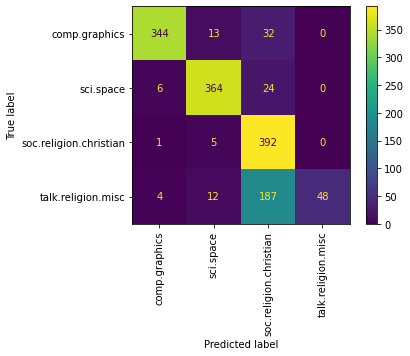

In [ ]:
ConfusionMatrixDisplay.from_estimator(model, test.data, test.target, display_labels=test.target_names, xticks_rotation='vertical')
plt.show()

Now we have a tool to classify statements into one of the four classes.

We make use of predict function on pipeline for predicting category of a test string

In [ ]:
def predict_category(s, train=train, model=model):
  pred = model.predict([s])
  return train.target_names[pred[0]]

In [ ]:
print(predict_category('sending a playload to the ISS'))

soc.religion.christian


In [ ]:
print(predict_category('discussing islam vs atheism'))

soc.religion.christian


In [ ]:
print(predict_category('determining the screen resolution'))

comp.graphics
